In [1]:
import os
import sys
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aqiGDL
%matplotlib inline

In [46]:
gdf_est = aqiGDL.gdf_from_db('estaciones_gdl','Estaciones')
gdf_est = ox.project_gdf(gdf_est,to_crs='EPSG:4485')
gdf_est.head(2)

ProgrammingError: (psycopg2.errors.UndefinedTable) relation "estaciones.estaciones_gdl" does not exist
LINE 1: SELECT * FROM estaciones.estaciones_gdl
                      ^

[SQL: SELECT * FROM estaciones.estaciones_gdl]
(Background on this error at: http://sqlalche.me/e/13/f405)

In [51]:
df = pd.read_csv('../data/raw/ubicaciones_pip_v2.csv')
df.Latitud = df.Latitud.apply(lambda x: x/10)
df.head()

,Nombre,Latitud,Longitud
0,Mercado Municipal de Zapopan,20.722076,-103.391246
1,Centro Cultural Constitución Zapopan,20.727291,-103.368109
2,"Comisaría de la Policía Municipal de Tonalá, D...",20.686951,-103.263205
3,"LabASE, Laboratorio de Arquitectura Social Est...",20.524669,-103.371598


In [47]:
G = aqiGDL.graph_from_db('Guadalajara')
edges = ox.graph_to_gdfs(G,nodes=False)
#edges = ox.project_gdf(edges,to_crs='EPSG:4485')
#G = None
edges.head(2)

,oneway,lanes,name,highway,maxspeed,length,geometry,access,ref,bridge,tunnel,service,junction,width,area,u,v,key
0,True,4,Avenida Francisco Javier Mina,secondary,50,48.976,"LINESTRING (-103.33052 20.67248, -103.33097 20...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28781524,6486583408,0
1,True,4,Calzada del Ejército,secondary,NaN,55.894,"LINESTRING (-103.33052 20.67248, -103.33069 20...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28781524,8366980134,0


In [48]:
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [53]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitud, df.Latitud))
gdf.set_crs(edges.crs, inplace=True)

,Nombre,Latitud,Longitud,geometry
0,Mercado Municipal de Zapopan,20.722076,-103.391246,POINT (-103.39125 20.72208)
1,Centro Cultural Constitución Zapopan,20.727291,-103.368109,POINT (-103.36811 20.72729)
2,"Comisaría de la Policía Municipal de Tonalá, D...",20.686951,-103.263205,POINT (-103.26321 20.68695)
3,"LabASE, Laboratorio de Arquitectura Social Est...",20.524669,-103.371598,POINT (-103.37160 20.52467)


In [57]:
gdf_air = gpd.read_file('../data/processed/PM10_2018-12-20_23h_hour.geojson')
gdf_air = ox.project_gdf(gdf_air,to_crs='EPSG:4485')
gdf_air.head(2)

,lat,long,conc,geometry
0,20.529149,-103.455437,216.763139,POINT (1288259.609 2288312.311)
1,20.539149,-103.455437,213.181621,POINT (1288207.853 2289426.289)


In [30]:
gdf = ox.project_gdf(gdf,to_crs='EPSG:4485')
gdf

,Nombre,Latitud,Longitud,geometry
0,Mercado Municipal de Zapopan,207.220764,-103.391246,POINT (11308446.849 19995341.899)
1,Centro Cultural Constitución Zapopan,207.272913,-103.368109,POINT (11308446.783 19995341.751)
2,"Comisaría de la Policía Municipal de Tonalá, D...",206.869507,-103.263205,POINT (11308446.483 19995342.895)
3,"LabASE, Laboratorio de Arquitectura Social Est...",205.246692,-103.371598,POINT (11308446.793 19995347.500)


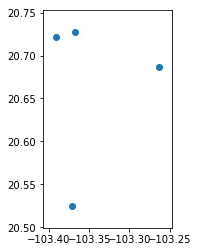

In [54]:
gdf.plot()

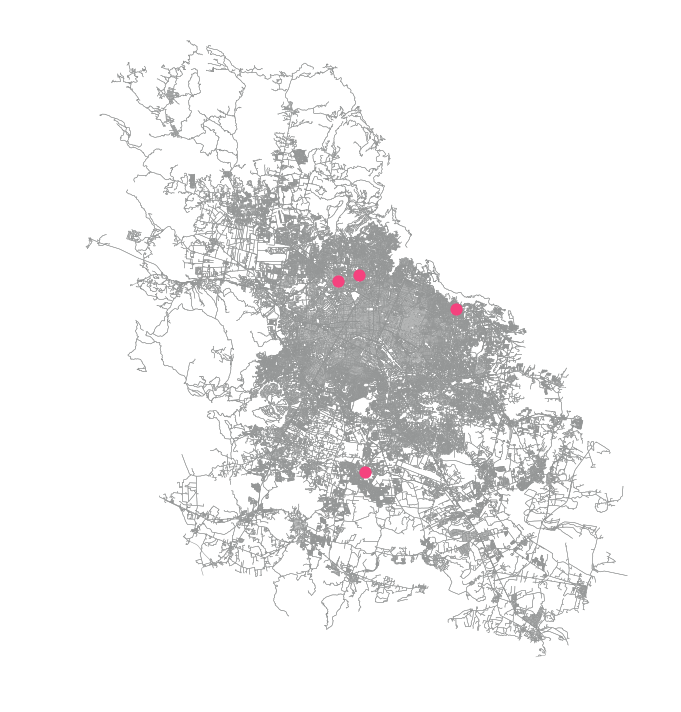

In [55]:
edges = ox.project_gdf(edges,to_crs='EPSG:4485')
gdf = ox.project_gdf(gdf,to_crs='EPSG:4485')
fig, ax = plt.subplots(1,1,figsize=(10,10))
edges.plot(ax=ax, color='#929494', zorder=0, linewidth=0.5)

#gdf_est.plot(ax=ax, zorder=3, color='#f5427e',markersize=500, marker='.')
gdf.plot(ax=ax, zorder=3, color='#f5427e',markersize=500, marker='.')
#gdf_est.buffer(1100).plot(ax=ax, zorder=2, color='#f5424e', alpha=0.5)

#minx, miny, maxx, maxy = gdf_air.geometry.total_bounds

#ax.set_xlim(minx,maxx)
#ax.set_ylim(miny,maxy)
ax.axis('off')
fig.tight_layout()
plt.savefig(f'../output/figures/GDL-puntos_pip.png',dpi=300,transparent=True, bbox_inches = 'tight')

In [56]:
gdf_est = gdf

(2287312.311495612, 2312651.581859525)

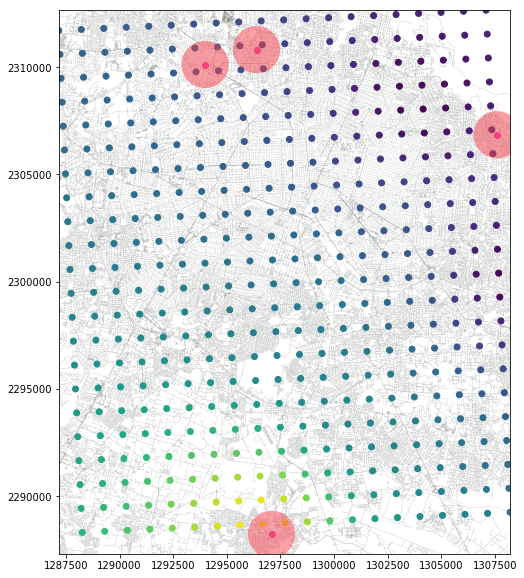

In [65]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
edges.plot(ax=ax, color='#929494', zorder=0, linewidth=0.1)
gdf_air.plot(ax=ax, column='conc', zorder=1)
gdf_est.plot(ax=ax, zorder=3, color='#f5427e')
gdf_est.buffer(1100).plot(ax=ax, zorder=2, color='#f5424e', alpha=0.5)

minx, miny, maxx, maxy = gdf_air.geometry.total_bounds
miny = miny-1000

ax.set_xlim(minx,maxx)
ax.set_ylim(miny,maxy)

In [62]:
gdf_est['Name'] = gdf_est['Nombre']

In [63]:
buffer_dist = 1000
buffer = gpd.GeoDataFrame({'geometry':gdf_est.buffer(buffer_dist),'Name':gdf_est['Name']},geometry='geometry',crs=gdf_est.crs)
buffer['mean-conc'] = gpd.sjoin(buffer,gdf_air).groupby(['Name']).mean().reset_index()['conc']

In [ ]:
fig, axes = plt.subplots(2,1,figsize=(10,14), gridspec_kw={"height_ratios":[0.96, 0.03]})
ax = axes[0]
edges.plot(ax=ax, color='#929494', zorder=0, linewidth=0.1)
#gdf_air.plot(ax=ax, column='conc', zorder=1)
gdf_est.plot(ax=ax, zorder=3, color='#f5427e')
buffer.plot(ax=ax, zorder=2,  column='mean-conc', markersize=buffer_dist, alpha=0.5, cax=axes[1],legend=True, 
            cmap='magma_r', legend_kwds={'label': "Valor promedio en zona de captura",'orientation': "horizontal"})

minx, miny, maxx, maxy = gdf_air.geometry.total_bounds
miny = miny-1500
ax.set_ylim(miny,maxy+1500)
ax.axis('off')
axes[1].set_xlabel(f'Valor promedio PM10\nBuffer:{buffer_dist} m.',fontsize=20)
axes[1].tick_params(labelsize=20)
fig.tight_layout()
for f in ['pdf','png']:
    plt.savefig(f'../output/figures/GDL-PIP_V2-pm10-test.{f}',dpi=300,transparent=False, bbox_inches = 'tight')